In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [23]:
data = pd.read_csv("caudal_extra.csv", parse_dates=["fecha"])

In [50]:
data["fecha"] = data["fecha"].astype('datetime64[ns]')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411180 entries, 0 to 1411179
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Unnamed: 0              1411180 non-null  int64         
 1   codigo_estacion         1411180 non-null  int64         
 2   institucion             1411180 non-null  object        
 3   fuente                  1411180 non-null  object        
 4   nombre                  1411180 non-null  object        
 5   altura                  1411180 non-null  int64         
 6   latitud                 1411180 non-null  float64       
 7   longitud                1411180 non-null  float64       
 8   codigo_cuenca           1411180 non-null  int64         
 9   nombre_sub_cuenca       1411180 non-null  object        
 10  cantidad_observaciones  1411180 non-null  int64         
 11  fecha                   1411180 non-null  datetime64[ns]
 12  caudal        

In [69]:
data.head()

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN
1,1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN
2,2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN
3,3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN
4,4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN


In [12]:
data.describe()

,Unnamed: 0,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,7.055895e+05,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01
std,4.073727e+05,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00
min,0.000000e+00,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01
25%,3.527948e+05,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01
50%,7.055895e+05,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01
75%,1.058384e+06,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01
max,1.411179e+06,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01


3.a

In [150]:
def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    base = data.loc[((data["codigo_estacion"]==codigo_estacion) & (data["fecha"]>=fecha_min) & (data["fecha"]<=fecha_max))]
    base.sort_values(by=['fecha'], inplace=True)
    fig = plt.figure()
    plt.scatter(base["fecha"],base[columna])
    return fig

In [151]:
fecha_inicio = pd.Timestamp("1960-01-06")
fecha_termino = pd.Timestamp("1990-01-06")
column = "caudal"
estacion = 4540001

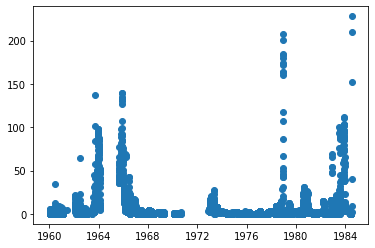

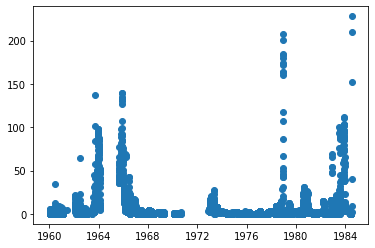

In [152]:
time_plot_una_estacion(estacion,column,fecha_inicio,fecha_termino)

3.b

In [153]:
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    base = data.loc[((data["codigo_estacion"]==codigo_estacion) & (data["fecha"]>=fecha_min) & (data["fecha"]<=fecha_max))]
    base.sort_values(by=['fecha'], inplace=True)
    fig = plt.figure()
    for name in columnas:
        max_value = base[name].max()
        min_value = base[name].min()
        base[name] = (base[name] - min_value) / (max_value - min_value)
        plt.plot(base["fecha"],base[name])
    #plt.show()
    
    return plt.show()

In [154]:
fecha_inicio = pd.Timestamp("2017-01-01")
fecha_termino = pd.Timestamp("2017-07-01")
columns = ["caudal","precip_promedio", "temp_max_promedio"]
estacion = 11335002

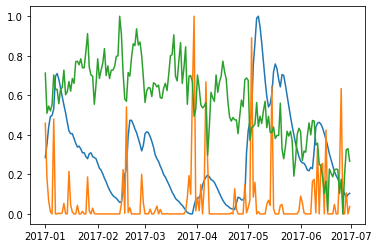

In [155]:
data2 = time_plot_estaciones_varias_columnas(estacion,columns,fecha_inicio,fecha_termino)

4 (primero el analisis historico y despues se agregan las variables extremas)

In [156]:
Seasons = {10:"Primavera",11:"Primavera",12:"Primavera",1:"Verano",2:"Verano",3:"Verano",4:"Otoño",5:"Otoño",6:"Otoño",7:"Invierno",8:"Invierno",9:"Invierno"}
data["Season"] = data['fecha'].apply(lambda x: Seasons[x.month])

In [223]:
data["caudal_extremo"] = data.groupby(["Season","codigo_cuenca"])["caudal"].transform('quantile', 0.95)
data["caudal_extremo"] = np.where(data["caudal"] > data["caudal_extremo"], 1,0)

data["precip_extremo"] = data.groupby(["Season","codigo_cuenca"])["precip_promedio"].transform('quantile', 0.95)
data["precip_extremo"] = np.where(data["precip_promedio"] > data["precip_extremo"], 1,0)

data["temp_extremo"] = data.groupby(["Season","codigo_cuenca"])["temp_max_promedio"].transform('quantile', 0.95)
data["temp_extremo"] = np.where(data["temp_max_promedio"] > data["temp_extremo"], 1,0)

In [226]:
data[data["caudal_extremo"]==1]

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,...,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,Season,rank_caudal,caudal_extremo,precip_extremo,temp_extremo
28,28,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,98.1,4540001,Rio Grande En Paloma 1,0.0,NaN,Primavera,50.985,1,0,0
29,29,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,94.9,4540001,Rio Grande En Paloma 1,0.0,NaN,Primavera,50.985,1,0,0
30,30,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,98.1,4540001,Rio Grande En Paloma 1,0.0,NaN,Primavera,50.985,1,0,0
31,31,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,23.0,4540001,Rio Grande En Paloma 1,0.0,NaN,Verano,13.760,1,0,0
32,32,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,77.0,4540001,Rio Grande En Paloma 1,0.0,21.500000,Invierno,23.400,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411079,1411079,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,...,522.0,7322001,Rio Maule En Longitudinal,0.0,11.150000,Primavera,411.000,1,0,0
1411080,1411080,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,...,768.0,7322001,Rio Maule En Longitudinal,0.0,14.550000,Primavera,411.000,1,0,0
1411081,1411081,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,...,533.0,7322001,Rio Maule En Longitudinal,0.0,25.924999,Verano,156.250,1,0,0
1411100,1411100,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,...,175.0,7322001,Rio Maule En Longitudinal,0.0,28.266666,Verano,156.250,1,0,0
